In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
import plotly.express as px
import requests
import bs4

In [ ]:
df = pd.read_csv('/content/sample-sales-data/sales_data_sample.csv', delimiter=',', encoding='Latin-1')
#display(df)
#list(df.columns.values)

In [ ]:
#df.iloc[:,[0,12,13,5,1,2,3,4,24,6,7,8,9]]
dfSales = df.iloc[:,[0,12,13,5,1,2,3,4,24,6,7,8,9]]
dfCustomer = df.iloc[:,[13,14,15,16,17,18,19,20,21,22,23]]
dfProduct = df.iloc[:,[12,11,10]]

In [ ]:
df['CustomerPrivilege'] = 'Other'
df.loc[df['DEALSIZE'] == 'Small', 'CustomerPrivilege'] = 'Regular'
df.loc[df['DEALSIZE'] == 'Medium', 'CustomerPrivilege'] = 'VIP'
df.loc[df['DEALSIZE'] == 'Large', 'CustomerPrivilege'] = 'VVIP'

In [ ]:
class Customer:
  def __init__(self, df):
    self.CustName = df['CUSTOMERNAME']
    self.FirstName = df['CONTACTFIRSTNAME']
    self.LastName = df['CONTACTLASTNAME']
    self.Region = df['TERRITORY']
    self.Country = df['COUNTRY']
    self.State = df['STATE']
    self.City = df['CITY']
    self.AddressLine1 = df['ADDRESSLINE1']
    self.AddressLiine2 = df['ADDRESSLINE2']
    self.Phone = df['PHONE']
    self.PostalCode = df['POSTALCODE']
    self.CustomerPrivileges = df['CustomerPrivilege']
    print('Customer constructor called')

  def __del__(self):
    print('Destructor called!!')

  def CustInfo(self):
        raise NotImplementedError("This method is implemented in the subclass")

class Info(Customer):
  def CustInfo(self):
    print('This is to display customer info')

In [ ]:
class Product:
  def __init__(self, df):
    self.ProductCode = df['PRODUCTCODE']
    self.ProductName = 'NA'
    self.ProductLine = df['PRODUCTLINE']
    self.ProductMRP = df['MSRP']
    self.Category = 'NA'
    self.Supplier = 'NA'
    print('Product constructor called')

  def __del__(self):
    print('Destructor called!!')

In [ ]:
class Sales:
  def __init__(self, df):
    self.OrderNumber = df['ORDERNUMBER']
    self.OrderLineNumber = df['ORDERLINENUMBER']
    self.OrderDate = df['ORDERDATE']
    self.Status = df['STATUS']
    self.OrderQty = df['QUANTITYORDERED']
    self.PriceEach = df['PRICEEACH']
    self.Sales = df['SALES']
    self.DealSize = df['DEALSIZE']
    print('Sales constructor called')

  def __del__(self):
    print('Destructor called!!')

In [ ]:
cust = Customer(df)
prod = Product(df)
s = Sales(df)

Customer constructor called
Product constructor called
Sales constructor called


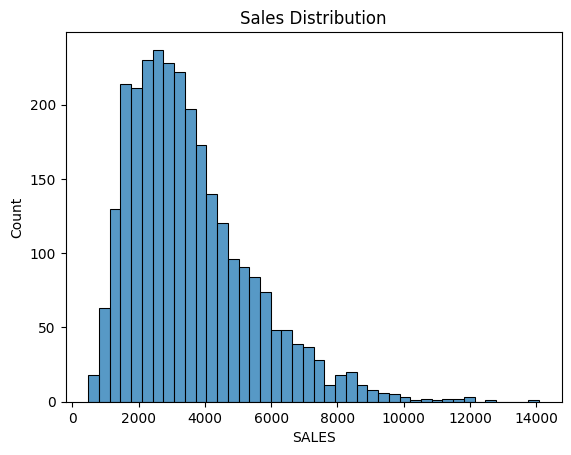

In [ ]:
# Sales distribution
snr.histplot(df['SALES'])
plt.title('Sales Distribution')
plt.show()

In [ ]:
# Sales vs Country
fig = px.pie(df, values="SALES", names="COUNTRY", title="Total Sales per country", width=900, height=500)
fig.show()

In [ ]:
# Web Scrapping
url = 'https://www.kaggle.com/datasets/kyanyoga/sample-sales-data'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # For example, find all <a> tags with class 'some-class'
    links = soup.find_all('a', class_='some-class')

    # Print the extracted data
    for link in links:
        print(link.get('href'))
else:
    print('Failed to retrieve the webpage')

In [ ]:
# Currency conversion
api_key = '37854ead7f72411db3e86a8b59a40834' #API Key
source_currency = input("Enter the source currency code: ").upper()
target_currency = input("Enter the target currency code: ").upper()
amount = float(input("Enter the amount to convert: "))
url = f'https://api.currencyfreaks.com/v2.0/convert/latest?apikey={api_key}&from={source_currency}&to={target_currency}&amount={amount}'

try:
    response = requests.get(url)
    #print(response)
    if response.status_code == 200:
        data = response.json()
        converted_amount = data.get('convertedAmount')
        if converted_amount:
            print(f'{amount} {source_currency} is equal to {converted_amount} {target_currency}')
        else:
            print('Conversion data not found in the API response.')
    else:
        print(f'Failed to retrieve data. Status code: {response.status_code}')

except requests.exceptions.RequestException as e:
    print(f'An error occurred: {e}')


<ipython-input-37-d3435ddd5f09>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



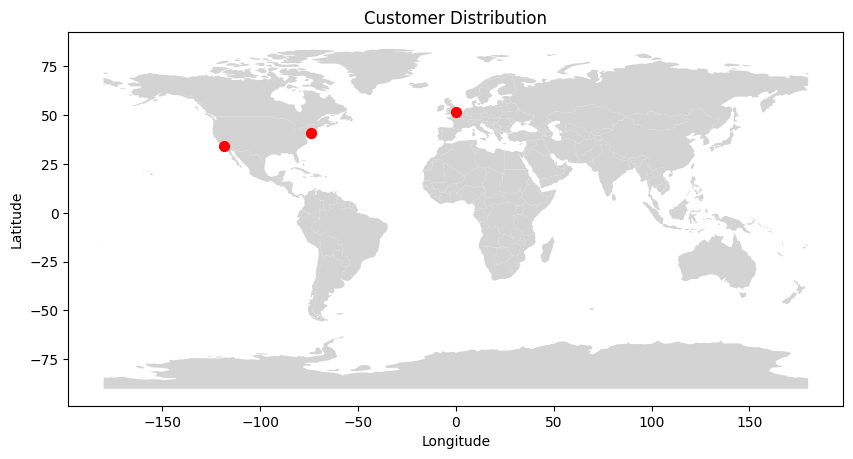

In [ ]:
#Sample map for customer distribution as there is no latitude and longitude info available in the dataset

import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Generate some sample customer data with latitudes and longitudes
customer_data = {
    'Name': ['Customer A', 'Customer B', 'Customer C'],
    'Latitude': [40.7128, 51.5074, 34.0522],
    'Longitude': [-74.0060, -0.1278, -118.2437]
}

# Create a GeoDataFrame from the customer data
gdf = gpd.GeoDataFrame(customer_data, geometry=gpd.points_from_xy(customer_data['Longitude'], customer_data['Latitude']))

# Plot the world map
world.plot(figsize=(10, 6), color='lightgrey')

# Plot the customer locations on top of the world map
gdf.plot(ax=plt.gca(), color='red', marker='o', markersize=50)

# Add title and labels
plt.title('Customer Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()